In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%pylab inline
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [2]:
data = pd.read_excel('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Crime.xlsx')

In [3]:
feature = ['males','south','yrsSch','policExp60','policeExp59','labour',
           'M/F','statePop','unemp14','unemp35','income','proverty']

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


In [5]:
# Q1. Looking at the impact of each feature separately (on all 47 observations)
    # Fitting bi-variate regressions and reporting the statistics
# Q2. Take for the further consideration only those which have p-value < 5% (in their bi-variate regressions)
    # Compute correlation matrix among those
# Q3. Fit the multi-variate regression with X3, X4, X8, X11, report statistics, visualize prediction vs reality
# Q4. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    # Put 30 observations into training set and the remaining 17 into test set
    # Run it 100 times, obtain the average value
# Q5. Run cross-validation with X4 only, same settings as Q4, then compare your OS R2 with the counterpart in Q4

Q1

In [6]:
for i in range(1,12):
    lm = smf.ols(formula='Y ~ X%d' % i, data = data).fit()
    print('X%d: R2=%f, p-value=%f, model: Y~%f*X%d+%f' % (i,lm.rsquared,lm.pvalues[1],lm.params[1],i,lm.params[0]))



X1: R2=0.008005, p-value=0.549789, model: Y~-0.275347*X1+128.664557
X2: R2=0.008215, p-value=0.544586, model: Y~-7.318750*X2+93.000000
X3: R2=0.104222, p-value=0.026878, model: Y~1.116121*X3+-27.396654
X4: R2=0.472800, p-value=0.000000, model: Y~0.894848*X4+14.446398
X5: R2=0.444508, p-value=0.000000, model: Y~0.922203*X5+16.516424
X6: R2=0.035670, p-value=0.203581, model: Y~0.180755*X6+-10.929773
X7: R2=0.045759, p-value=0.148794, model: Y~0.280765*X7+-185.489484
X8: R2=0.113889, p-value=0.020351, model: Y~0.342838*X8+77.954816
X9: R2=0.002548, p-value=0.736150, model: Y~-0.108288*X9+100.846541
X10: R2=0.031443, p-value=0.233108, model: Y~0.812047*X10+62.916195
X11: R2=0.194763, p-value=0.001902, model: Y~0.176893*X11+-2.428261


Q2

In [7]:
data[['X3','X4','X5','X8','X11']].corr()

,X3,X4,X5,X8,X11
X3,1.000000,0.482952,0.499410,-0.017227,0.735997
X4,0.482952,1.000000,0.993586,0.526284,0.787225
X5,0.499410,0.993586,1.000000,0.513789,0.794262
X8,-0.017227,0.526284,0.513789,1.000000,0.308263
X11,0.735997,0.787225,0.794262,0.308263,1.000000


Q3

In [8]:
lm = smf.ols(formula='Y ~ X3+X4+X5+X8+X11', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     9.411
Date:                Fri, 04 Nov 2016   Prob (F-statistic):           4.96e-06
Time:                        10:48:05   Log-Likelihood:                -220.02
No. Observations:                  47   AIC:                             452.0
Df Residuals:                      41   BIC:                             463.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.9177     42.504      0.092      0.9

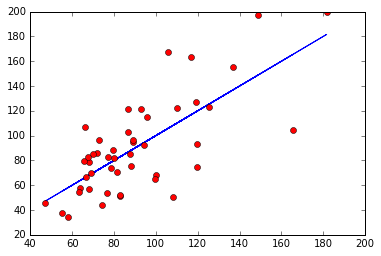

In [9]:
plt.figure()
lmy=lm.predict(data)
plt.plot(lmy, lmy, 'b-')
plt.plot(lmy, data.Y,'or')

Q4

In [15]:
# Using cross validation.
R_IS=[]
R_OS=[]

n=100

for i in range(n):
    train, test = train_test_split(data, test_size = 17.0/47)
    lm = smf.ols(formula='Y~X3+X4+X8+X11',data=train).fit()
    R_IS.append(lm.rsquared)
    lmy = lm.predict(test)
    y_err = lmy - test.Y
    y_norm = test.Y-mean(test.Y)
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    R_OS.append(R2)
print("IS R^2 for {} times is {}".format(n,np.mean(R_IS)))
print("OS R^2 for {} times is {}".format(n,np.mean(R_OS)))

IS R^2 for 100 times is 0.54067333335
OS R^2 for 100 times is 0.139894933606


Q5

In [14]:
# Using cross validation.
R_IS=[]
R_OS=[]

n=100

for i in range(n):
    train, test = train_test_split(data, test_size = 17.0/47)
    lm = smf.ols(formula='Y~X4',data=data).fit()
    R_IS.append(lm.rsquared)
    lmy = lm.predict(test)
    y_err = lmy - test.Y
    y_norm = test.Y-mean(test.Y)
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    R_OS.append(R2)
print("IS R^2 for {} times is {}".format(n,np.mean(R_IS)))
print("OS R^2 for {} times is {}".format(n,np.mean(R_OS)))

IS R^2 for 100 times is 0.472799887508
OS R^2 for 100 times is 0.371071318818
